In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import math
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving KNNAlgorithmDataset-1.csv to KNNAlgorithmDataset-1.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['KNNAlgorithmDataset-1.csv']))

In [4]:
df.count()

,0
id,569
diagnosis,569
radius_mean,569
texture_mean,569
perimeter_mean,569
area_mean,569
smoothness_mean,569
compactness_mean,569
concavity_mean,569
concave points_mean,569


In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# 1. Data Dimensionality
# Total number of patients
total_patients = df.shape[0]

# Number of attributes (categories)
number_of_attributes = df.shape[1]

# Data types of the attributes
data_types = df.dtypes

# Checking for missing values
missing_values = df.isnull().sum()

#Number of patients in each target class
diagnosis_counts = df['diagnosis'].value_counts()


# Printing the results
print(f"Total number of patients: {total_patients}")
print(f"Number of attributes: {number_of_attributes}")
print("\nData Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)
print("\nNumber of patients in each target class:")
print(diagnosis_counts)

Total number of patients: 569
Number of attributes: 33

Data Types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst      

In [8]:
# Drop the column named 'Unnamed: 32'
df = df.drop(columns=["Unnamed: 32"])

# Print 5 rows with updated file
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [9]:
X = df.drop(columns=['id', 'diagnosis'])
Y = df['diagnosis']
print(X)
print(Y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sn

In [11]:
# Encoding M and B to 1 and 0 respectively
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Finding Optimal K using Square root of the sample size method
k_sqrt = math.sqrt(len(df))
k_sqrt_floor = math.floor(k_sqrt)

print("K-value from square root method:", k_sqrt_floor)

K-value from square root method: 23


[0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193]


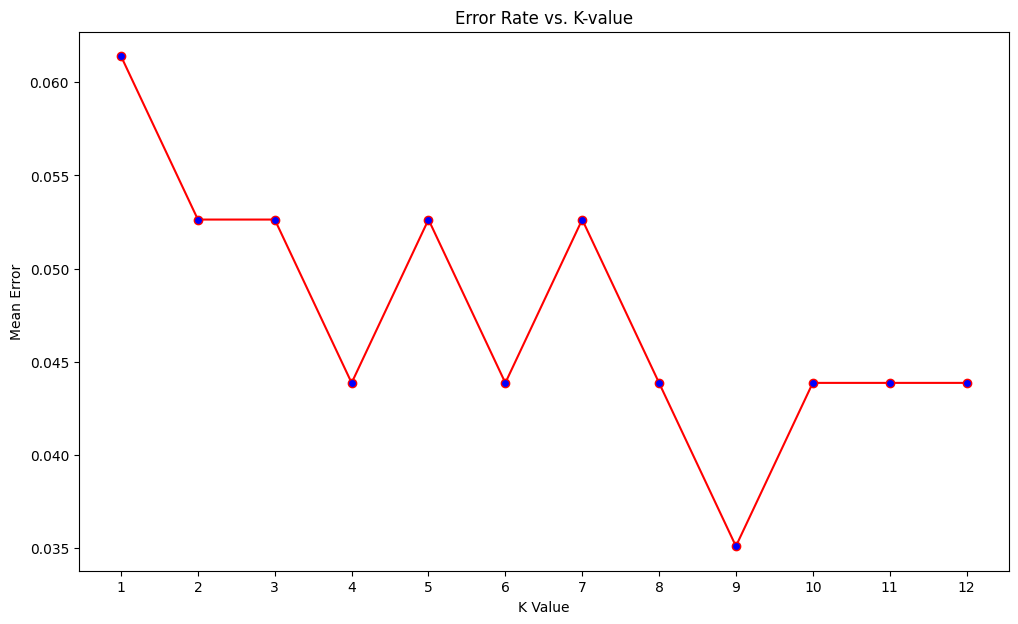

Optimal K value from error plot: 9


In [19]:
#Finding Optimal K using error plot
error = []
accuracies = []

# Calculating error for K values between 1 and 12
for i in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    accuracies.append(accuracy_score(Y_test, pred_i))

print(accuracies)
plt.figure(figsize=(12, 7))
plt.plot(range(1, 13), error, color='red', marker='o', markerfacecolor='blue')
plt.title('Error Rate vs. K-value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.xticks(range(1, 13))
plt.show()

optimal_k = error.index(min(error)) + 1
print("Optimal K value from error plot:", optimal_k)

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, Y_train)

Y_pred_optimal = knn_optimal.predict(X_test)

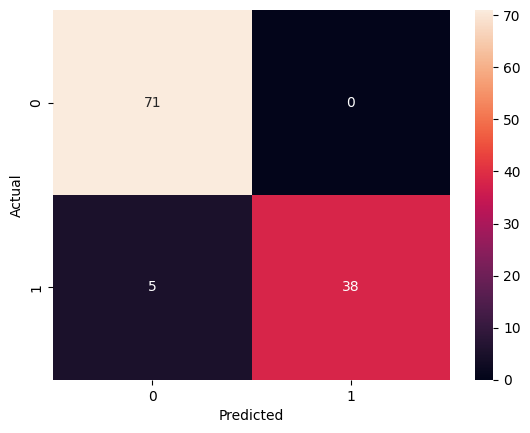

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy score using the Square root method:  0.956140350877193


In [20]:
# Using K-value from the square root method
knn_sqrt = KNeighborsClassifier(n_neighbors = k_sqrt_floor)
knn_sqrt.fit(X_test, Y_test)
Y_pred_sqrt=knn_sqrt.predict(X_test)

confusion_matrix_sqrt = pd.crosstab(Y_test, Y_pred_sqrt, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_sqrt, annot=True)
plt.show()

print(classification_report(Y_test, Y_pred_sqrt))
print("Accuracy score using the Square root method: ", accuracy_score(Y_test, Y_pred_sqrt))

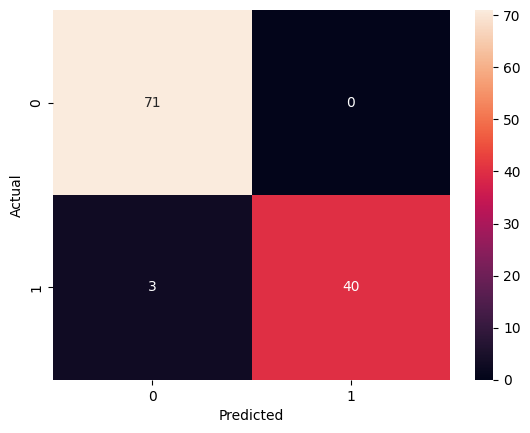

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy score using the error plot:  0.9736842105263158


In [21]:
# Using K-value from the error plot
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_test, Y_test)
Y_pred=knn.predict(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

print(classification_report(Y_test, Y_pred))
print("Accuracy score using the error plot: ", accuracy_score(Y_test, Y_pred))